In [28]:
import pickle
from multiprocessing import Pool

with open("/home/fengchen/md4/md4/data_dir/text8/text8_vocab.pkl", "rb") as f:
    vocab = pickle.load(f)

In [22]:
def post_process(texts):
    concated = " ".join(texts)
    generated_words = concated.split()
    s = 0
    for word in generated_words:
        if len(word) > 1:
            if word == " ":
                continue
            if word in vocab:   
                s += len(word) + 1
    return s / len(concated)

In [8]:
#md4_baseline
with open("/home/fengchen/md4/md4/text8_base/baseline_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)
with Pool(64) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )
with open(
    "/home/fengchen/md4/md4/text8_base/baseline_generations_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [5]:
with open("/home/fengchen/md4/md4/expt_mixed/baseline_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)
with Pool(64) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )
with open(
    "/home/fengchen/md4/md4/expt_mixed/baseline_generations_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [11]:
with open("/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_256.pkl", "rb") as f:
    results_dict = pickle.load(f)
with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

In [12]:
with open(
    "/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_256_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [30]:
meta_dict = {}
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    with open(
        f"/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_{timesteps}_acc_new.pkl",
        "rb",
    ) as f:
        results_dict = pickle.load(f)
    meta_dict[timesteps] = results_dict

In [14]:
for timesteps in timestep_list:
    meta_dict[timesteps] = max(meta_dict[timesteps].values())

In [15]:
with open(
    "/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_acc_max_new.pkl", "wb"
) as f:
    pickle.dump(meta_dict, f)

In [16]:
with open("/home/fengchen/md4/md4/expt_mixed/uninformed_corrector_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open(
    "/home/fengchen/md4/md4/expt_mixed/uninformed_corrector_generations_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [17]:
timestep_list = [16, 32, 64, 128, 256]

In [18]:
new_dict = {}
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [acc_dict[timesteps, step_size] for step_size in [0.5, 1.0, 2.0, 4.0]]
    )
with open(
    "/home/fengchen/md4/md4/expt_mixed/uninformed_corrector_generations_acc_max_new.pkl", "wb"
) as f:
    pickle.dump(new_dict, f)

In [23]:
with open("/home/fengchen/md4/md4/text8_base/uninformed_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open(
    "/home/fengchen/md4/md4/text8_base/uninformed_generations_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [24]:
new_dict = {}
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [acc_dict[timesteps, step_size] for step_size in [0.5, 1.0, 2.0, 4.0]]
    )
with open(
    "/home/fengchen/md4/md4/text8_base/uninformed_corrector_generations_acc_max_new.pkl", "wb"
) as f:
    pickle.dump(new_dict, f)

In [3]:
with open("/home/fengchen/md4/md4/text8_base/maskgit_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open("/home/fengchen/md4/md4/text8_base/maskgit_generations_acc_new.pkl", "wb") as f:
    pickle.dump(acc_dict, f)

In [5]:
new_dict = {}
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [
            acc_dict[timesteps, tem]
            for tem in [0.5, 1.0, 2.0, 4.0, 8.0, 10.0, 12.0, 16.0, 20.0, 40.0]
        ]
    )
with open("/home/fengchen/md4/md4/text8_base/maskgit_generations_acc_max_new.pkl", "wb") as f:
    pickle.dump(new_dict, f)

In [7]:
with open("/home/fengchen/md4/md4/text8_base/remdm_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open("/home/fengchen/md4/md4/text8_base/remdm_generations_acc_new.pkl", "wb") as f:
    pickle.dump(acc_dict, f)

In [8]:
new_dict={}
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [
            acc_dict[timesteps, sigma_cap]
            for sigma_cap in [0.02,0.04]
        ]
    )
with open("/home/fengchen/md4/md4/text8_base/remdm_generations_acc_max_new.pkl", "wb") as f:
    pickle.dump(new_dict, f)

In [ ]:
with open("/home/fengchen/md4/md4/expt_mixed/maskgit_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open("/home/fengchen/md4/md4/expt_mixed/maskgit_generations_acc_new.pkl", "wb") as f:
    pickle.dump(acc_dict, f)

In [ ]:
new_dict={}
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [
            acc_dict[timesteps, tem]
            for tem in [0.5, 1.0, 2.0, 4.0, 8.0, 10.0, 12.0, 16.0, 20.0, 40.0]
        ]
    )
with open("/home/fengchen/md4/md4/expt_mixed/maskgit_generations_acc_max_new.pkl", "wb") as f:
    pickle.dump(new_dict, f)

In [44]:
# get all four acc_max
import pickle

meta_results_dict = {}
# with open(
#     "/home/fengchen/md4/md4/text8_base/maskgit_generations_acc_max_new.pkl", "rb"
# ) as f:
#     meta_results_dict["maskgit"] = pickle.load(f)
with open(
    "/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_acc_max_new.pkl", "rb"
) as f:
    meta_results_dict["informed_corrector"] = pickle.load(f)
with open(
    "/home/fengchen/md4/md4/text8_base/uninformed_corrector_generations_acc_max_new.pkl",
    "rb",
) as f:
    meta_results_dict["uninformed_corrector"] = pickle.load(f)
# with open("/home/fengchen/md4/md4/expt_mixed/baseline_generations_acc_new.pkl", "rb") as f:
#     meta_results_dict["baseline"] = pickle.load(f)
with open("/home/fengchen/md4/md4/text8_base/baseline_generations_acc_new.pkl", "rb") as f:
    meta_results_dict["md4_baseline"] = pickle.load(f)
with open(
    "/home/fengchen/md4/md4/text8_base/remdm_generations_acc_max_new.pkl", "rb"
) as f:
    meta_results_dict["remdm"] = pickle.load(f)


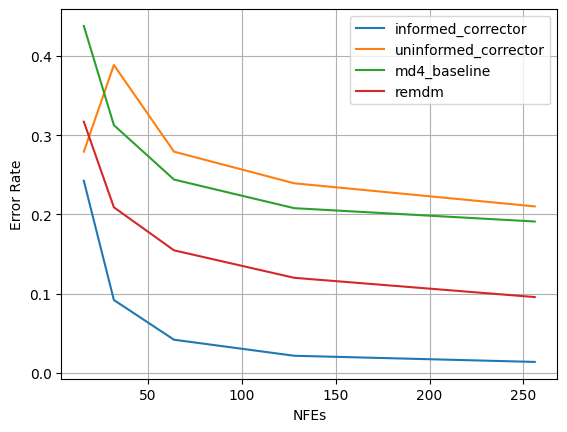

In [3]:
from matplotlib import pyplot as plt
import numpy as np

timestep_list = [16, 32, 64, 128, 256]
for key, value in meta_results_dict.items():
    plt.plot(
        timestep_list,
        1 - np.array([value[timestep] for timestep in timestep_list]),
        label=key,
    )
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("NFEs")
plt.grid()

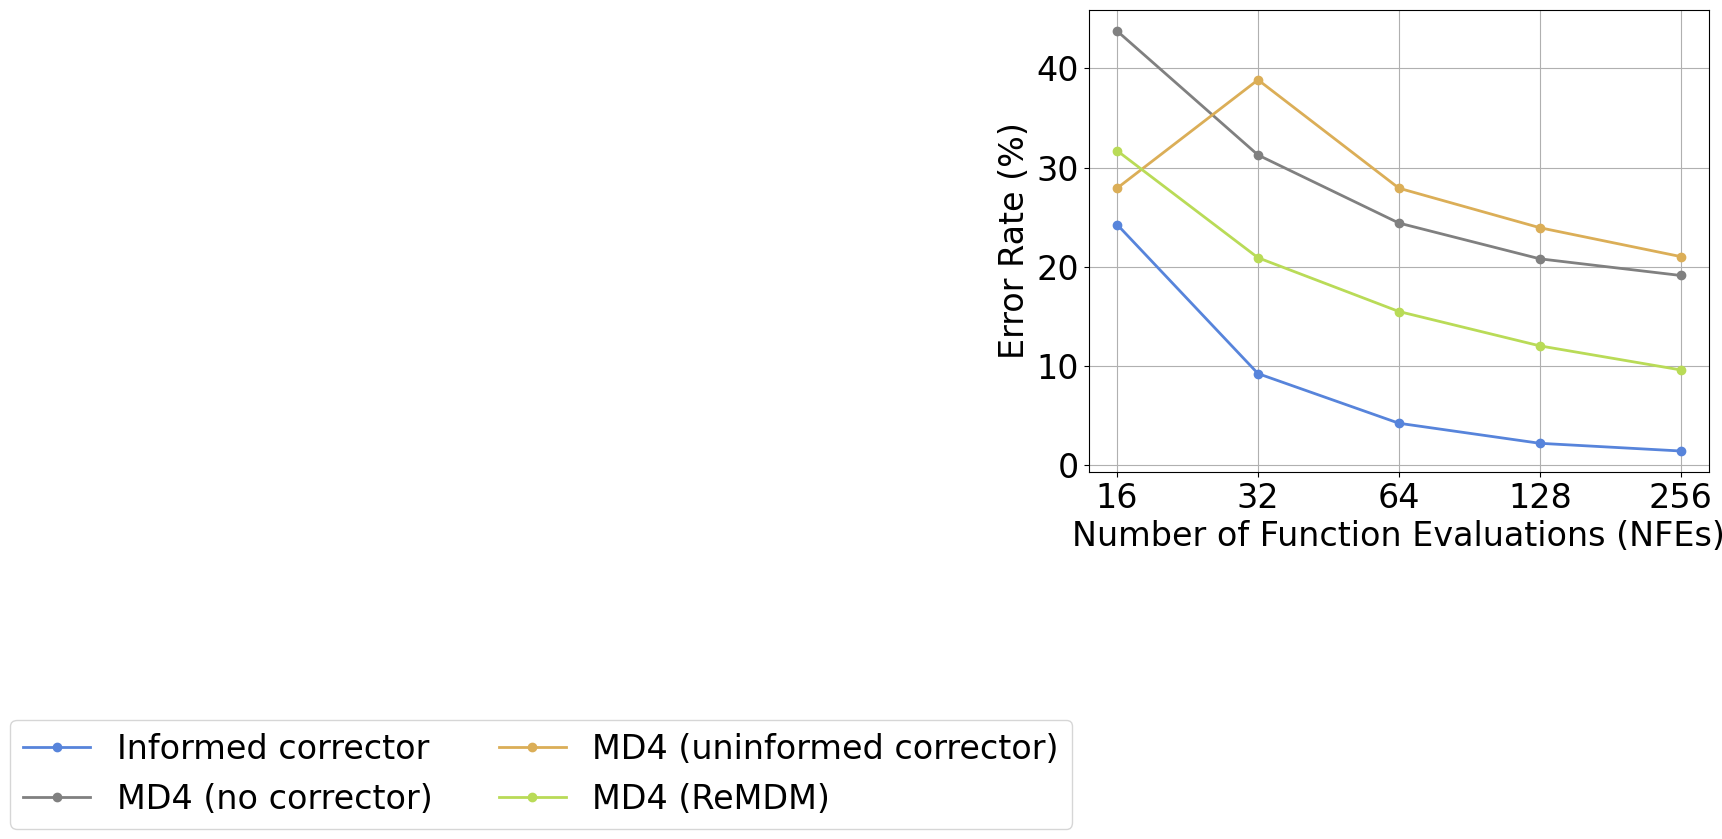

In [51]:
import math
import seaborn as sns
from matplotlib import ticker

# palette = sns.color_palette("tab10", n_colors=10)
palette = sns.color_palette("hls", n_colors=10)

# The parameters are kind of confusing here
method_mapping = {
    ("gibbs", 0, "gibbs"): "Ancestral (no corrector)",
    ("gibbs", 1, "gibbs"): "Ancestral (informed corrector)",
    ("euler", 1, "forward_backward"): "Ancestral (uninformed corrector)",
    ("maskgit", 0, "none"): "MaskGIT (no corrector)",
}

color_mapping = {
    ("gibbs", 0, "gibbs"): "grey",
    ("gibbs", 1, "gibbs"): palette[6],
    ("euler", 1, "forward_backward"): palette[1],
    ("maskgit", 0, "none"): palette[0],
}


# Apply mapping function to correctly label methods
def get_corrected_method_label(row):
    key = (row["method"], row["num_cstep"], row["corrector"])
    return method_mapping.get(key, "Other")


# Plot with all four groups
fig = plt.figure(figsize=(8, 6))

# for label, group in corrected_filtered_df.groupby("method_label"):
#     group = group.sort_values("NFE")
#     plt.plot(group["NFE"], group["fid"], marker="o", linestyle="-",
#              label=label, linewidth=2,
#              color=color_mapping.get(tuple(group[["method", "num_cstep", "corrector"]].iloc[0])))
label_mapping = {
    "informed_corrector": "Informed corrector",
    "uninformed_corrector": "MD4 (uninformed corrector)",
    "baseline": "HollowDiff (no corrector)",
    # "maskgit": "MaskGIT (no corrector)",
    "md4_baseline": "MD4 (no corrector)",
    "remdm": "MD4 (ReMDM)",
}

for ii, key in enumerate(
    ["informed_corrector", "md4_baseline","uninformed_corrector",  "remdm"]
):
    plt.plot(
        timestep_list,
        100
        - 100
        * np.array([meta_results_dict[key][timestep] for timestep in timestep_list]),
        label=label_mapping[key],
        marker="o",
        linestyle="-",
        linewidth=2,
        color=[palette[6],  "grey", palette[1], palette[2]][ii],
    )

fsize=24

plt.xlabel("Number of Function Evaluations (NFEs)", fontsize=fsize)
plt.ylabel("Error Rate (%)", fontsize=fsize)
# plt.title("Comparison of Diffusion Sampling Methods")
# plt.legend()

# Define the desired order of legend entries


# Apply the ordered legend
plt.legend(fontsize=fsize, ncol=2, bbox_to_anchor=(0, -0.5))


plt.xscale("log")
plt.yticks(fontsize=fsize)
plt.xticks([16, 32, 64, 128, 256], fontsize=fsize)
plt.gca().get_xaxis().set_major_formatter(ticker.ScalarFormatter())
plt.minorticks_off()
plt.grid(True)
plt.show()

fig.savefig("sampling_methods_text8_small_excluding_spaces.pdf", bbox_inches="tight")

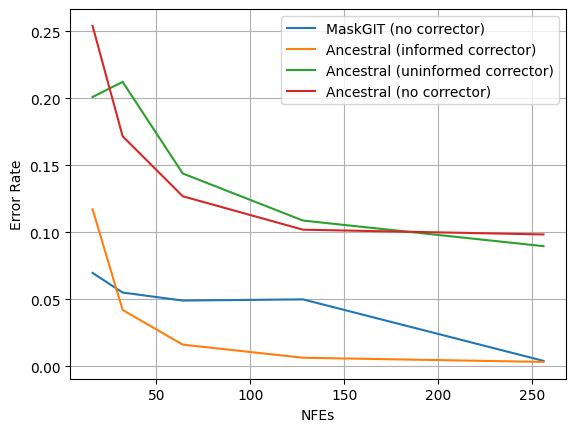

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import ticker

# Define the mapping between keys and descriptive labels
label_mapping = {
    "informed_corrector": "Ancestral (informed corrector)",
    "uninformed_corrector": "Ancestral (uninformed corrector)",
    "baseline": "Ancestral (no corrector)",
    "maskgit": "MaskGIT (no corrector)",
}

timestep_list = [16, 32, 64, 128, 256]
for key, value in meta_results_dict.items():
    plt.plot(
        timestep_list,
        1 - np.array([value[timestep] for timestep in timestep_list]),
        label=label_mapping[key],
    )
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("NFEs")
plt.grid()

In [20]:
with open(
    "/root/md4/data_dir/text8/informed_corrector_generations_32_acc.pkl", "rb"
) as f:
    results_dict = pickle.load(f)

In [21]:
results_dict

{(1, 0.1): 0.904065390406539,
 (1, 1.0): 0.8800309597523219,
 (1, 2.0): 0.8369433897134967,
 (1, 10.0): 0.772189863513866,
 (1, 1000.0): 0.7615160856162897,
 (2, 0.1): 0.9350966690958975,
 (2, 1.0): 0.9271560025679435,
 (2, 2.0): 0.8891309920533197,
 (2, 10.0): 0.798390237569778,
 (2, 1000.0): 0.7821040322231365,
 (4, 0.1): 0.9580700506339708,
 (4, 1.0): 0.7615160856162897,
 (4, 2.0): 0.9347062853228293,
 (4, 10.0): 0.813671587514611,
 (4, 1000.0): 0.7821040322231365,
 (8, 0.1): 0.9566152597402597,
 (8, 1.0): 0.9532112023583912,
 (8, 2.0): 0.9461368277739959,
 (8, 10.0): 0.8407232027550581,
 (8, 1000.0): 0.8010197411426331,
 (16, 0.1): 0.9349056230461794,
 (16, 1.0): 0.933620159803319,
 (16, 2.0): 0.9360852197070573,
 (16, 10.0): 0.8419837537409149,
 (16, 1000.0): 0.7876209398756047}

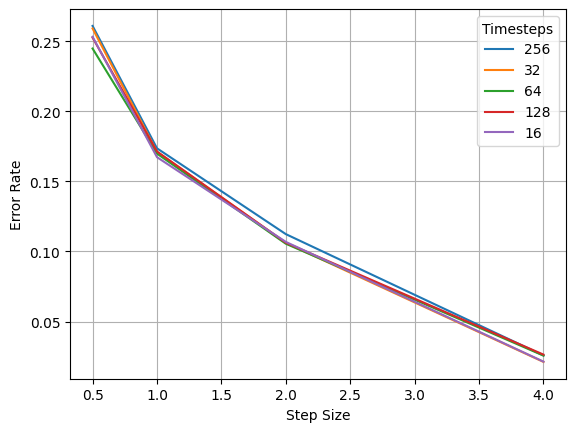

In [26]:
with open(
    "/root/md4/data_dir/text8/uninformed_corrector_generations_acc.pkl", "rb"
) as f:
    results_dict = pickle.load(f)

x_list = []
y_list = []
value_list = []
for key, value in results_dict.items():
    x_list.append(key[0])
    y_list.append(key[1])
    value_list.append(value)

# plot those with the sample x values and plot curves with different y values
x_list = np.array(x_list)
y_list = np.array(y_list)
value_list = np.array(value_list)

for x in set(x_list):
    plt.plot(y_list[x_list == x], 1 - value_list[x_list == x], label=f"{x}")
plt.legend(title="Timesteps")
plt.xlabel("Step Size")
plt.ylabel("Error Rate")
plt.grid()
plt.show()

In [2]:
with open("/root/md4/data_dir/text8/uninformed_corrector_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

In [19]:
texts = results_dict[16, 0.5]

In [21]:
concated = " ".join(texts)
generated_words = concated.split()
s = 0
for word in generated_words:
    if word in vocab:
        s += len(word) + 1
s / len(concated)

0.5581952075876063

In [16]:
"te" in vocab

True

In [13]:
concated

'                            our                        e co te                    e s ae          ee  ly ae                        he                                    ee  ly ae                           iee tee                                                                                              e  on                      e  an                                                                                                                               e  an                    and te           e  in                                                                                                                                                 iee tee                                                                   e the               e ment     r men                                                       iee of the                                                               he                   e  on                                                                          our 

In [12]:
generated_words

['our',
 'e',
 'co',
 'te',
 'e',
 's',
 'ae',
 'ee',
 'ly',
 'ae',
 'he',
 'ee',
 'ly',
 'ae',
 'iee',
 'tee',
 'e',
 'on',
 'e',
 'an',
 'e',
 'an',
 'and',
 'te',
 'e',
 'in',
 'iee',
 'tee',
 'e',
 'the',
 'e',
 'ment',
 'r',
 'men',
 'iee',
 'of',
 'the',
 'he',
 'e',
 'on',
 'our',
 'e',
 'in',
 'e',
 't',
 'our',
 'e',
 'ere',
 'iee',
 'tee',
 'our',
 'he',
 'e',
 'the',
 'he',
 'e',
 'in',
 'e',
 'ing',
 't',
 'ee',
 'an',
 'ingh',
 'e',
 'in',
 'e',
 'ine',
 'tee',
 'ing',
 't',
 'e',
 'ine',
 'tee',
 'he',
 'e',
 'wo',
 'e',
 'he',
 'e',
 'an',
 'e',
 'iee',
 'tee',
 'e',
 'external',
 'i',
 's',
 'e',
 'in',
 'e',
 'e',
 'on',
 'e',
 'our',
 'e',
 's',
 'ee',
 'and',
 'to',
 'e',
 'an',
 'e',
 'an',
 'an',
 'iee',
 'tee',
 'e',
 'on',
 'e',
 's',
 'ae',
 'and',
 'te',
 'o',
 'k',
 'e',
 'in',
 'e',
 'e',
 'be',
 'ine',
 'tee',
 'and',
 'te',
 'iee',
 'tee',
 'ine',
 'tee',
 'e',
 's',
 'ae',
 'ing',
 't',
 'e',
 'an',
 'he',
 'e',
 's',
 'ae',
 'iee',
 'tee',
 'e',
 'an',
 '

In [29]:
with open("/home/fengchen/md4/md4/text8_base/uninformed_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

In [30]:
results_dict.keys()

dict_keys([(16, 0.5), (32, 0.5), (64, 0.5), (128, 0.5), (256, 0.5), (16, 1.0), (32, 1.0), (64, 1.0), (128, 1.0), (256, 1.0), (16, 2.0), (32, 2.0), (64, 2.0), (128, 2.0), (256, 2.0), (16, 4.0), (32, 4.0), (64, 4.0), (128, 4.0), (256, 4.0)])

In [39]:
np.mean([len(i) for i in ' '.join(list(results_dict[16,0.5])).split()])

np.float64(4.2769298916763985)

In [31]:

acc_dict

{(16, 0.5): 0.4602342247858766,
 (32, 0.5): 0.6114619669714173,
 (64, 0.5): 0.7208225986639611,
 (128, 0.5): 0.7607137700158835,
 (256, 0.5): 0.7898588723467317,
 (16, 1.0): 0.4444723102528442,
 (32, 1.0): 0.5700432426681258,
 (64, 1.0): 0.6823145847107909,
 (128, 1.0): 0.7585478367266288,
 (256, 1.0): 0.7871229566129363,
 (16, 2.0): 0.4357705782661894,
 (32, 2.0): 0.47525136225804243,
 (64, 2.0): 0.5889970588905862,
 (128, 2.0): 0.6955001785944993,
 (256, 2.0): 0.7569594856478421,
 (16, 4.0): 0.7208225986639611,
 (32, 4.0): 0.4467902388606431,
 (64, 4.0): 0.44932856068033106,
 (128, 4.0): 0.5243610496796699,
 (256, 4.0): 0.6505475631350555}

In [37]:
post_process(results_dict[16, 4.0])

0.7208225986639611

In [49]:
with open("/home/fengchen/md4/md4/text8_base/uninformed_generations_8.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

In [50]:
acc_dict

{(16, 4.0): 0.7124172575484675}

In [32]:
#gather samples
with open("/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_256.pkl", "rb") as f:
    results_dict = pickle.load(f)

In [33]:
examples=results_dict[(1,0.1)][:4]

In [38]:
with open("/home/fengchen/md4/md4/text8_base/baseline_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

In [40]:
examples=results_dict[256][:4]

In [42]:
s=''
for i in examples:
    words=i.split()
    for word in words:
        if word in vocab:
            s+=word+' '
        else:
            s+='\\textcolor{red}{'+word+' '+'}'
    s+='\n\n'
print(s)

ic other area two km tho west of shire mael \textcolor{red}{nontionment }home of the united planets \textcolor{red}{ampstone }six zero one km long in five zero five ft two zero five kh total ground opening gin \textcolor{red}{ashers }air force navy the nine seven ford mk one five two mk three fa mz four fi 

ccording to naldi and \textcolor{red}{closere }clinton are a lucid living scientist of \textcolor{red}{palger }political views held into persist unlike high leg \textcolor{red}{sacieties }in \textcolor{red}{sunghi }s future which muscle meat low ly no chef is a public catalysis of the a frequent \textcolor{red}{hebrid }\textcolor{red}{tlf }vampires \textcolor{red}{nympheo }

feature technology to harmonize anonymous \textcolor{red}{aapproaches }ragnar \textcolor{red}{trifls }livre by the word silva dam meaning small top or multi release good \textcolor{red}{repodentiam }defense genius multi \textcolor{red}{pllo }or hella \textcolor{red}{spasca }is derived from the verb meaning kill